In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import more_itertools

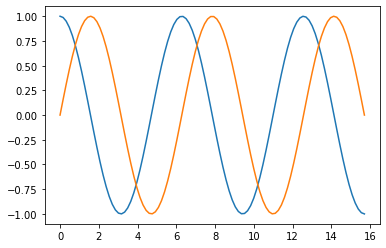

In [2]:
X = np.linspace(0, 5*np.pi, 100, endpoint=True)
C, S = np.cos(X), np.sin(X)

plt.plot(X, C)
plt.plot(X, S)

plt.show()

In [3]:
m_cos = list(more_itertools.windowed(C,10))
m_cos

[(1.0,
  0.9874388886763943,
  0.9500711177409454,
  0.8888354486549235,
  0.8052702575310586,
  0.7014748877063213,
  0.5800569095711982,
  0.44406661260577424,
  0.2969203753282749,
  0.14231483827328512),
 (0.9874388886763943,
  0.9500711177409454,
  0.8888354486549235,
  0.8052702575310586,
  0.7014748877063213,
  0.5800569095711982,
  0.44406661260577424,
  0.2969203753282749,
  0.14231483827328512,
  -0.015865963834807807),
 (0.9500711177409454,
  0.8888354486549235,
  0.8052702575310586,
  0.7014748877063213,
  0.5800569095711982,
  0.44406661260577424,
  0.2969203753282749,
  0.14231483827328512,
  -0.015865963834807807,
  -0.1736481776669303),
 (0.8888354486549235,
  0.8052702575310586,
  0.7014748877063213,
  0.5800569095711982,
  0.44406661260577424,
  0.2969203753282749,
  0.14231483827328512,
  -0.015865963834807807,
  -0.1736481776669303,
  -0.32706796331742166),
 (0.8052702575310586,
  0.7014748877063213,
  0.5800569095711982,
  0.44406661260577424,
  0.2969203753282749,

In [4]:
# m_cos = C.reshape((10,10))
m_cos = pd.DataFrame(m_cos, columns=['t9', 't8', 't7', 't6', 't5', 't4', 't3', 't2', 't1', 't0'])
m_cos

,t9,t8,t7,t6,t5,t4,t3,t2,t1,t0
0,1.000000,0.987439,0.950071,0.888835,0.805270,0.701475,0.580057,0.444067,0.296920,0.142315
1,0.987439,0.950071,0.888835,0.805270,0.701475,0.580057,0.444067,0.296920,0.142315,-0.015866
2,0.950071,0.888835,0.805270,0.701475,0.580057,0.444067,0.296920,0.142315,-0.015866,-0.173648
3,0.888835,0.805270,0.701475,0.580057,0.444067,0.296920,0.142315,-0.015866,-0.173648,-0.327068
4,0.805270,0.701475,0.580057,0.444067,0.296920,0.142315,-0.015866,-0.173648,-0.327068,-0.472271
...,...,...,...,...,...,...,...,...,...,...
86,0.472271,0.327068,0.173648,0.015866,-0.142315,-0.296920,-0.444067,-0.580057,-0.701475,-0.805270
87,0.327068,0.173648,0.015866,-0.142315,-0.296920,-0.444067,-0.580057,-0.701475,-0.805270,-0.888835
88,0.173648,0.015866,-0.142315,-0.296920,-0.444067,-0.580057,-0.701475,-0.805270,-0.888835,-0.950071
89,0.015866,-0.142315,-0.296920,-0.444067,-0.580057,-0.701475,-0.805270,-0.888835,-0.950071,-0.987439


<AxesSubplot:>

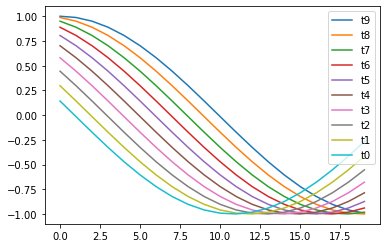

In [5]:
#as primeiras 20 linhas
m_cos[:20].plot()

<AxesSubplot:>

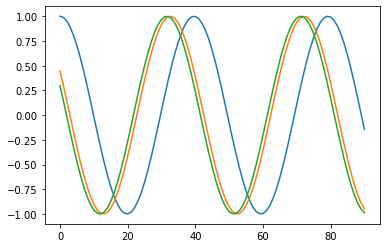

In [18]:
#plot da última coluna
m_cos['t9'].plot() 
m_cos['t2'].plot()
m_cos['t1'].plot()


# m_cos['t9'].plot() # --> tempo anterior ao t0 (defasado)


## Podemos observar acima a defasagem da função em relação ao intervalo anterior


Fica assim, então, construída a matriz defasada das posições, para em seguida alimentar a rede neural com valor de t9 a t1, para em seguida prever o t0

In [7]:
#maneira errada de construcao dos frames sem a defasagem

# m_cos = C.reshape((10,10))
# m_cos = pd.DataFrame(m_cos, columns=['t0', 't1', 't2', 't3', 't4', 't5', 't6', 't7', 't8', 't9'])
# m_cos

## Fornecer os valores de t1 a t9, para prever o t0

Definindo as variáveis de treino do modelo:

In [8]:
X = m_cos.drop('t0', axis=1)
X.head()

,t9,t8,t7,t6,t5,t4,t3,t2,t1
0,1.000000,0.987439,0.950071,0.888835,0.805270,0.701475,0.580057,0.444067,0.296920
1,0.987439,0.950071,0.888835,0.805270,0.701475,0.580057,0.444067,0.296920,0.142315
2,0.950071,0.888835,0.805270,0.701475,0.580057,0.444067,0.296920,0.142315,-0.015866
3,0.888835,0.805270,0.701475,0.580057,0.444067,0.296920,0.142315,-0.015866,-0.173648
4,0.805270,0.701475,0.580057,0.444067,0.296920,0.142315,-0.015866,-0.173648,-0.327068


In [9]:
X.shape

(91, 9)

Definindo as variáveis de teste:

In [35]:
y = m_cos['t0']
y.head()

0    0.142315
1   -0.015866
2   -0.173648
3   -0.327068
4   -0.472271
Name: t0, dtype: float64

In [55]:
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import accuracy_score
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import mean_squared_error

## Divisão da Série Temporal em Treino e Teste

In [25]:
X_train = X.iloc[0:60,:]
X_train.head()

,t9,t8,t7,t6,t5,t4,t3,t2,t1
0,1.000000,0.987439,0.950071,0.888835,0.805270,0.701475,0.580057,0.444067,0.296920
1,0.987439,0.950071,0.888835,0.805270,0.701475,0.580057,0.444067,0.296920,0.142315
2,0.950071,0.888835,0.805270,0.701475,0.580057,0.444067,0.296920,0.142315,-0.015866
3,0.888835,0.805270,0.701475,0.580057,0.444067,0.296920,0.142315,-0.015866,-0.173648
4,0.805270,0.701475,0.580057,0.444067,0.296920,0.142315,-0.015866,-0.173648,-0.327068


In [40]:
X_train.shape

(60, 9)

In [37]:
y_train = y.iloc[0:60]
y.head()

0    0.142315
1   -0.015866
2   -0.173648
3   -0.327068
4   -0.472271
Name: t0, dtype: float64

In [39]:
y_train.shape

(60,)

In [49]:
X_test = X.iloc[60:91,:]
X_test.head()

,t9,t8,t7,t6,t5,t4,t3,t2,t1
60,-0.995472,-0.967949,-0.916108,-0.841254,-0.745264,-0.630553,-0.500000,-0.356886,-0.204807
61,-0.967949,-0.916108,-0.841254,-0.745264,-0.630553,-0.500000,-0.356886,-0.204807,-0.047582
62,-0.916108,-0.841254,-0.745264,-0.630553,-0.500000,-0.356886,-0.204807,-0.047582,0.110838
63,-0.841254,-0.745264,-0.630553,-0.500000,-0.356886,-0.204807,-0.047582,0.110838,0.266474
64,-0.745264,-0.630553,-0.500000,-0.356886,-0.204807,-0.047582,0.110838,0.266474,0.415415


In [50]:
y_test = y.iloc[60:91]
y_test.head()

60   -0.047582
61    0.110838
62    0.266474
63    0.415415
64    0.553920
Name: t0, dtype: float64

In [51]:
model = Sequential()
model.add(Dense(40, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mae')

In [52]:
# fit model
model.fit(X_train, y_train, epochs=100, verbose=2)

2021-08-12 22:13:38.741920: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)
2021-08-12 22:13:38.906053: I tensorflow/core/platform/profile_utils/cpu_utils.cc:114] CPU Frequency: 2899885000 Hz


Epoch 1/100
2/2 - 23s - loss: 0.4930
Epoch 2/100
2/2 - 0s - loss: 0.4215
Epoch 3/100
2/2 - 0s - loss: 0.3596
Epoch 4/100
2/2 - 0s - loss: 0.3078
Epoch 5/100
2/2 - 0s - loss: 0.2776
Epoch 6/100
2/2 - 0s - loss: 0.2666
Epoch 7/100
2/2 - 0s - loss: 0.2522
Epoch 8/100
2/2 - 0s - loss: 0.2351
Epoch 9/100
2/2 - 0s - loss: 0.2102
Epoch 10/100
2/2 - 0s - loss: 0.1806
Epoch 11/100
2/2 - 0s - loss: 0.1538
Epoch 12/100
2/2 - 0s - loss: 0.1406
Epoch 13/100
2/2 - 0s - loss: 0.1244
Epoch 14/100
2/2 - 0s - loss: 0.1020
Epoch 15/100
2/2 - 0s - loss: 0.0887
Epoch 16/100
2/2 - 0s - loss: 0.0803
Epoch 17/100
2/2 - 0s - loss: 0.0718
Epoch 18/100
2/2 - 0s - loss: 0.0649
Epoch 19/100
2/2 - 0s - loss: 0.0556
Epoch 20/100
2/2 - 0s - loss: 0.0516
Epoch 21/100
2/2 - 0s - loss: 0.0452
Epoch 22/100
2/2 - 0s - loss: 0.0392
Epoch 23/100
2/2 - 0s - loss: 0.0339
Epoch 24/100
2/2 - 0s - loss: 0.0308
Epoch 25/100
2/2 - 0s - loss: 0.0277
Epoch 26/100
2/2 - 0s - loss: 0.0221
Epoch 27/100
2/2 - 0s - loss: 0.0207
Epoch 28/

In [68]:
# demonstrate prediction
yhat = model.predict(X_test, verbose=2)

1/1 - 0s


In [69]:
yhat

array([[-0.04317509],
       [ 0.10790549],
       [ 0.2518678 ],
       [ 0.41766807],
       [ 0.55598515],
       [ 0.6678049 ],
       [ 0.79489625],
       [ 0.8730128 ],
       [ 0.93140423],
       [ 0.9763636 ],
       [ 0.9985167 ],
       [ 0.98228925],
       [ 0.95191026],
       [ 0.9000684 ],
       [ 0.81846887],
       [ 0.718193  ],
       [ 0.5994424 ],
       [ 0.46750063],
       [ 0.32415354],
       [ 0.1725525 ],
       [ 0.0270485 ],
       [-0.14886187],
       [-0.29550442],
       [-0.4426279 ],
       [-0.57988346],
       [-0.70322835],
       [-0.8080736 ],
       [-0.8906026 ],
       [-0.9502402 ],
       [-0.9878427 ],
       [-1.0023353 ]], dtype=float32)

In [70]:
mean_squared_error(y_test,yhat)

3.303005333981143e-05

<AxesSubplot:>

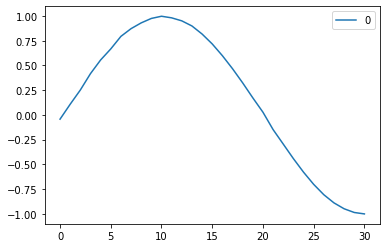

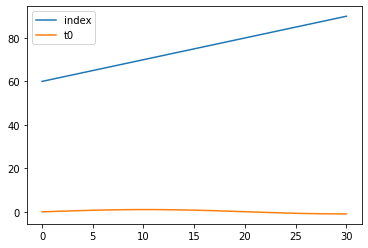

In [79]:
pd.DataFrame(yhat).plot()
pd.DataFrame(y_test).plot()